In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Cargar el archivo desde el sistema local
from google.colab import files
uploaded = files.upload()


Saving datos_editados_18_05_version1.csv to datos_editados_18_05_version1.csv


In [ ]:
# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]
print(file_name)

datos_editados_18_05_version1.csv


In [ ]:
# Cargar los datos
datos_editados = pd.read_csv(file_name, encoding='latin1')

In [ ]:
print(len(datos_editados)) #1013
print(datos_editados.columns)

1388
Index(['Frase', 'Consensuada'], dtype='object')


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_texts, test_texts, train_labels, test_labels = train_test_split(
    datos_editados['Frase'],
    datos_editados['Consensuada'],
    test_size=0.15,
    random_state=42,
    stratify=datos_editados['Consensuada']
)

In [ ]:
# Vectorización de texto utilizando Bag of Words
vectorizer = CountVectorizer(max_features=5000)  # Puedes ajustar max_features según sea necesario
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

In [ ]:
# Convertir las etiquetas a numpy arrays
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
# Definir el modelo de clasificación (Regresión Logística)
model = LogisticRegression(max_iter=1000)  # Puedes ajustar max_iter según sea necesario
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Evaluar el modelo
y_pred = model.predict(X_test)

In [ ]:
# Reporte de clasificación
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.57      0.73      0.64        41
           1       0.71      0.77      0.74        44
           2       0.83      0.78      0.81        69
           3       0.46      0.41      0.44        29
           4       0.88      0.58      0.70        26

    accuracy                           0.69       209
   macro avg       0.69      0.66      0.66       209
weighted avg       0.71      0.69      0.69       209



In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
class_names = [f'class_{i}' for i in range(len(np.unique(y_test)))]
class_names = ['SE', 'AA', 'E', 'CON','CA']

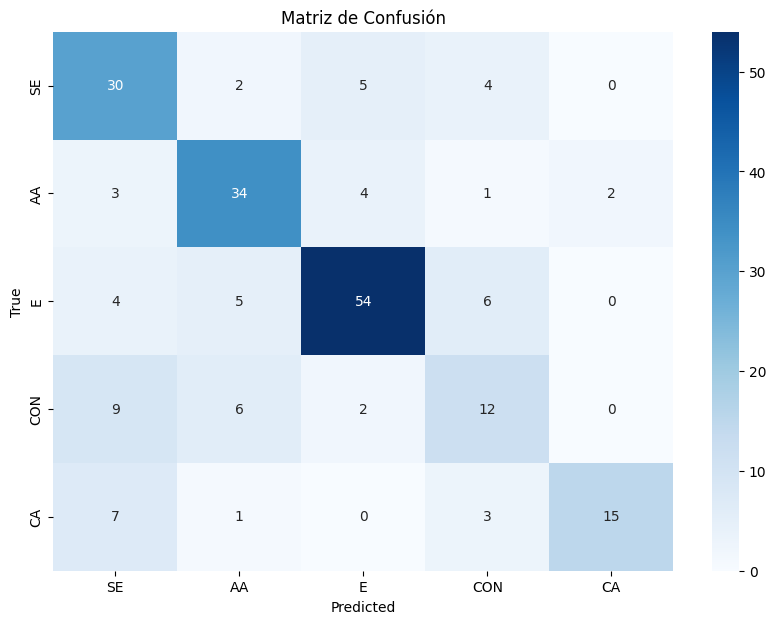

In [ ]:
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()